In [1]:
bids_folder = '/data/ds-tmsrisk/'
import os.path as op
import arviz as az

from tms_risk.cogmodels.fit_model import build_model, get_data
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df1 = get_data(model_label='flexible1')
model1 = build_model('flexible1', df1)
idata1 = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', 'model-flexible1_trace.netcdf'))

df2 = get_data(model_label='flexible1_null')
model2 = build_model('flexible1_null', df2)
idata2 = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', 'model-flexible1_null_trace.netcdf'))


# Make everything for n 3
df3 = get_data(model_label='flexible1b')
model3 = build_model('flexible1b', df3)
idata3 = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', 'model-flexible1b_trace.netcdf'))


df4 = get_data(model_label='flexible2')
model4 = build_model('flexible2', df4)
idata4 = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', 'model-flexible2_trace.netcdf'))

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


In [3]:
for model, idata in zip([model1, model2, model3, model4], [idata1, idata2, idata3, idata4]):
    model.build_estimation_model()
    with model.estimation_model:
        pm.compute_log_likelihood(idata)

In [4]:
idata4

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

In [5]:
models = {'Flexible 1': idata1, 'Flexible 1 (null)': idata2, 'Flexible (only 2nd option)': idata3, 'Flexible 2 (perceptual/memory parameterisation)': idata4}

In [6]:
comparison = az.compare(models)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

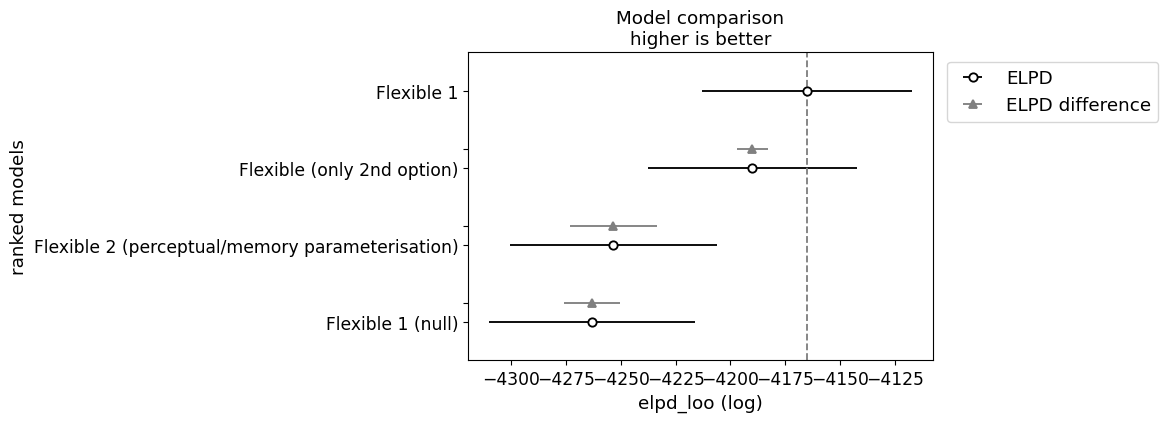

In [7]:
az.plot_compare(comparison)

In [8]:
comparison

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Flexible 1,0,-4165.067598,260.191402,0.000000,7.460606e-01,47.730527,0.000000,True,log
Flexible (only 2nd option),1,-4189.974442,229.585120,24.906844,0.000000e+00,47.746816,7.164867,True,log
Flexible 2 (perceptual/memory parameterisation),2,-4253.284963,255.781784,88.217365,2.539394e-01,47.143012,19.913163,True,log
Flexible 1 (null),3,-4263.135692,178.002682,98.068094,3.170131e-12,46.795820,12.603480,True,log
